# Reading and Visualizing Structural MRI Data

In this lesson we will learn how to read structural MRI images of a brain into Python, visualize them as slices, and perform a couple of simple image processing operations on images.

Structural MRI is a generic term for any MRI scan intended to image the structure of the body. These are sometimes called anatomical scans. This is in contrast to functional MRI, which are scans designed to measure some aspect of physiological function (typically neural activation). We will work with functional MRI data later in this chapter.

## Load in required packages

New to us are two packages for working with images:
- [imageio](https://pypi.org/project/imageio/) is a Python library that provides an easy interface to read and write a wide range of image data, including animated images, volumetric data, and scientific formats
- [ndimage](https://docs.scipy.org/doc/scipy/reference/ndimage.html) is part of the SciPy pacakge, which contains functions for multidimensional image processing

In [38]:
import imageio as iio
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt

## Read a DICOM image

[DICOM](https://www.dicomstandard.org/) is the international standard for medical images and related information. It defines the formats for medical images that can be exchanged with the data and quality necessary for clinical use. DICOM stands for *Digital Imaging and Communications in Medicine* and is recognized by the International Organization for Standardization as the ISO 12052 standard. DICOM is the standard format for most medical imaging devices used in hospitals and clinical care settings, including MRI, PET, CT, Xray, and ultrasound. For this reason, it is common that raw MRI data comes off the scanner in DICOM format. 

The imageio package provides an `imread()` function that is capable of reading DICOM images. The first argument is the file name, and the second is the format. Below we read in a single slice from a structural MRI scan of a head, and show they type of the resulting object:

In [67]:
brain_slice = iio.imread('data/DICOM/IM-0004-0096.dcm', 'DICOM')

type(brain_slice)

imageio.core.util.Array

## View metadata
We can view the image meta-data which is stored in the `.meta` property of the imageio object. This contains lots of information, such as the date and location of the scan, the manufacturer of the scanner, the type of scanner (modality; i.e., that it is an MRI scan), and details of the person who was scanned. Since this scan was acquired for research purposes, the "patient" information does not contain personally-identifying information like the name or birth. date of the person who was scanned.

In [2]:
brain_slice.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2.1'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.4'),
      ('SOPInstanceUID',
       '1.2.840.113619.2.176.3596.7771172.7255.1265293350.477'),
      ('StudyDate', '20100204'),
      ('SeriesDate', '20100204'),
      ('AcquisitionDate', '20100204'),
      ('ContentDate', '20100204'),
      ('StudyTime', '201859'),
      ('SeriesTime', '202511'),
      ('AcquisitionTime', '202511'),
      ('ContentTime', '202511'),
      ('Modality', 'MR'),
      ('Manufacturer', 'GE MEDICAL SYSTEMS'),
      ('InstitutionName', 'IWK Health Centre'),
      ('SeriesDescription', 'SAG 3D T1 SPGR'),
      ('PatientName', 'AARONTEST'),
      ('PatientID', 'AARONTEST'),
      ('PatientBirthDate', ''),
      ('PatientSex', 'M '),
      ('PatientAge', '000Y'),
      ('PatientWeight', 70.307),
      ('SliceSpacing', 1.0),
      ('StudyInstanceUID',
       '1.2.840.113619.2.176.3596.7771172.7628.1265291937.899'),
      ('SeriesInstanceUID',
       '1.2.840.113619.

## View image dimensions

Because we loaded in a single image *slice*, our image is 2-dimensional, like a photograph. We can view its *x* and *y* dimensions with the `.shape` property. Although the image is stored as an object of type `imageio.core.util.Array`, the object is designed in a way that allows us to treat it in many ways like a simple NumPy array, so standard properties like `.shape` are available:

In [3]:
brain_slice.shape

(256, 256)

The output above tells us that the image comprises 256 x 256 pixels. In medical imaging, the term **voxels** is typically used instead of pixels, because each element in the image actually represents a cube with a volume. In the metadata above, the `'SliceSpacing'` field tells us that the thickness of this slice is 1 mm, and the `'sampling'` field tells us that each voxel in the slice is 1 x 1 mm. Since these are pieces of information stored in the `.meta` prperty, we can access them individually using the following syntax:

In [72]:
brain_slice.meta['sampling']

(1.0, 1.0)

## View contents of image

We can use NumPy indexing to view the data values of the first row of the image:

In [4]:
brain_slice[0]

Array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  3,  2,  4,  1,  8, 10,
        6, 13,  4,  9,  9,  0, 23, 60, 57, 32, 24, 20, 12, 19,  7, 12,  2,
        7, 21, 16, 11, 19, 13,  8, 27, 17, 22, 33, 18, 13, 14,  0,  1, 22,
       21, 42, 46, 34, 37, 11, 23, 29, 27, 47, 49, 30,  7, 20, 50, 30, 10,
       25, 61, 41, 49, 57,  0,  2, 12, 16, 28, 24,  4, 21, 65, 51, 37, 32,
       27, 13, 10, 29, 34,  1,  7, 15, 21, 51, 24, 19, 34, 12, 21, 26, 21,
       28, 11,  4, 15, 20, 18, 24, 25,  9, 12, 33, 33,  5,  4, 11, 33, 54,
       15,  4, 14,  5,  0, 24, 51, 45, 19,  2,  7, 13, 18, 26, 18,  9, 25,
       11, 16, 41, 32, 13,  7, 14, 13, 16, 31, 27,  6, 22, 22,  8,  5,  8,
        3,  4,  8,  3, 17

Or the first column of the image:

In [5]:
brain_slice[:, 0]

Array([  0,   0,   0,   0,   0,   0,  13,  23,  19,  49,  35,  17,  82,
        34,  80,  24,  14,  63,  55,  84,  14,  32,   1,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

## Visualize the image

Since the MRI data is a 2D NumPy array of integers, we can plot it using Matplotlib's `plt.imshow()`:

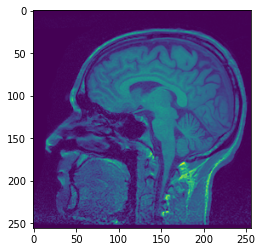

In [6]:
plt.imshow(brain_slice)

We can see that this image was acquired in the **sagittal** plane, which is like looking at the person from the side.

We can clean the image up by using a greyscale color map, and removing the numerical axis labels:

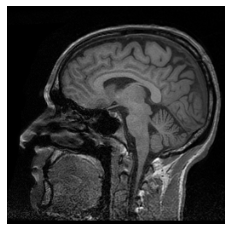

In [7]:
plt.imshow(brain_slice, cmap='gray')
plt.axis('off')
plt.show()

## Load a brain volume

Above re loaded a single slice through the head, but in fact this was from a scan that covered the entire head. As noted, each slice was 1 mm thick, and it took 184 slices to cover the entire head in the sagittal plane. Each slice is saved in a separate DICOM file. All of the DICOM images (slices) from this scan are stored in the `data/DICOM` folder. Above we used `iio.imread()` and specified a specific filename as the first argument, to load a single 2D slice/image. To load the entire 3D brain volume, we use imageio's `volread()` function, and pass as the first argument the name of the folder, rather than a list of files:

In [107]:
brain_vol = iio.volread('data/DICOM', 'DICOM')

Reading DICOM (examining files): 1/184 files (0.5183/184 files (99.5%184/184 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 184/184  (100.0%)


Now we can see from the `.shape` property that this is a 3D volume, with slices as the first dimension in the image array:

In [16]:
brain_vol.shape

(184, 256, 256)

## Visualize one slice of the volume

We can plot a slice of the 3D volume using the same `plt.imshow()` command as before; the one difference is we need to specify which slice number to plot. Since slices are the first dimension of teh array, we only need to supply one index, even though it is a 3D array (the other dimensions are treated as if we specified `brain_vol[96, :, :]`). We pick a slice in the middle of the volume, because if we picked one near the edges (e.g., slice 0) we would likely see little or no interesting anatomy. THis time we use the `bone` colormap, which is another monochrome palette but with a slight blueish hue:

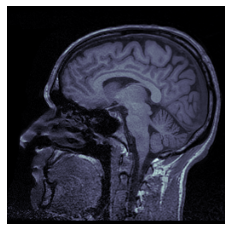

In [17]:
plt.imshow(brain_vol[96], cmap='bone')
plt.axis('off')
plt.show()

## Visualize a slice through different planes

Since the data are a 3D NumPy array, it is very easy to "reslice" the image and visualize the head from one of the other two orientations, axial and coronal. Below we pass `:` to select all sagittal slices, and `128` for the second dimension to get the slice midway through the volume, in the axial plane. Again, we omit the third dimension and so `:` is assumed:

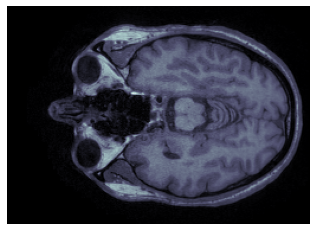

In [73]:
plt.imshow(brain_vol[:, 128], cmap='bone')
plt.axis('off')
plt.show()

### Rotate the image
Typically in showing axial slices, we orient them so that the nose and eyes are at the top of the image. The `scipy.ndimage` package (which we imported with the alias `ndi` provides a tool to rotate images, and we can embed it inside our `.imshow()` command to apply a rotation. The first argument to `ndi.rotate()` is the image, and the second is the amount of rotation, in degrees. The rotation is counter-clockwise, so here we need to use 270 deg rotation:

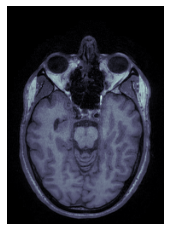

In [74]:
plt.imshow(ndi.rotate(brain_vol[:, 128], 270), cmap='bone')
plt.axis('off')
plt.show()

### Coronal plane
Finally, we can do this in the coronal place as well; again rotation is necessary. 

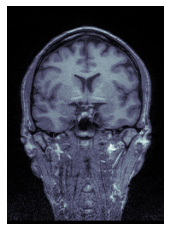

In [75]:
plt.imshow(ndi.rotate(brain_vol[:, :, 128], 270), cmap='bone')
plt.axis('off')
plt.show()

## Plotting a series of slices through a volume

We can use our skills with Matplotlib subplots to plot a series of slices through the brain, which is a more comprehensive way of visualizing the data. The biggest trick with this is deciding on the number of subplots (slices) we want, and then doing the necessary math to select the appropriate slices from the 3D volume such that the slices are evenly-spaced through the volume, and centered in the middle of the volume. For instance, below we will generate a 4 x 4 array of 16 subplots. Our number of slices — 184 — does not divide evenly by 16 (`184 / 16 = 11.5`). For this reason, we can't simply run a `for` loop over a range of slice numbers that starts at 0 and goes up to the number of slices, in steps of `n_slices / n_subplots`. Instead, we use floor division (`//`) to generate the integer result of dividing the number of slices by subplots (`11`) so that we get a step size that ensures we have 16 evenly-spaced slices through the volume. Then, we determine the number of slices that will be covered by 16 subplots, spaced 11 slices apart from each other (which will be < 184). Finally, we compute a `start_stop` value which tells us which slice to start from (i.e., the first slice to plot), such that the set of slices we generate will be centered on the volume. This is determined by computing how many slices in the volume are *not* covered by our 16 subplots (i.e., the slices at either edge of the volume), and dividing this by 2, since half of those slices should be at one edge of the volume, at the other at the other end of the volume.

In [46]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

Having done this math, we now loop through the slices and plot them, starting with the slice defined by `start_stop`:

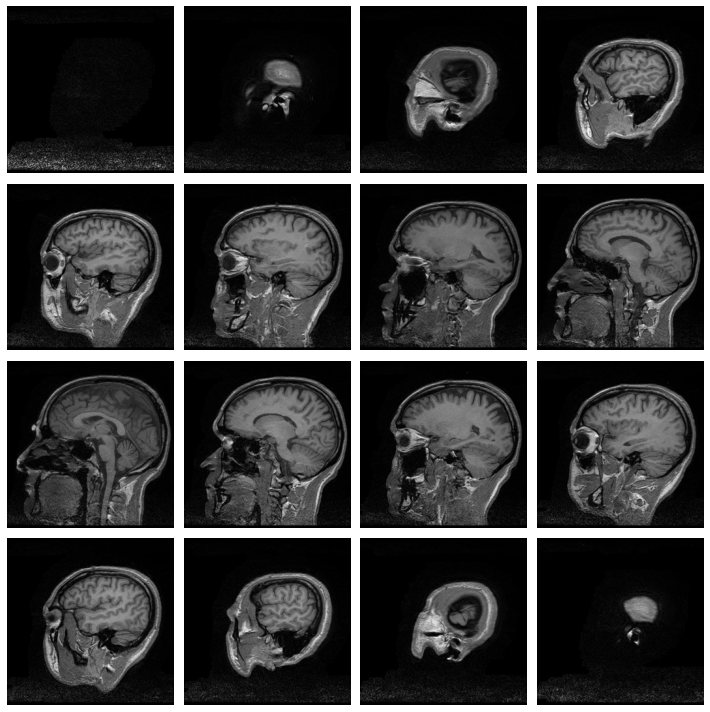

In [46]:
fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(brain_vol[img, :, :], cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()

## Slice through a different axis

We can use the same approach to plot the data through other image planes. The only things we need to change are: 
- which dimension of the image to use to derive `n_slice`
- the dimension that we specify the slice number in, inside the `.imshow()` command
- adding rotation for axial and coronal slices, as we did above when plotting a single slice

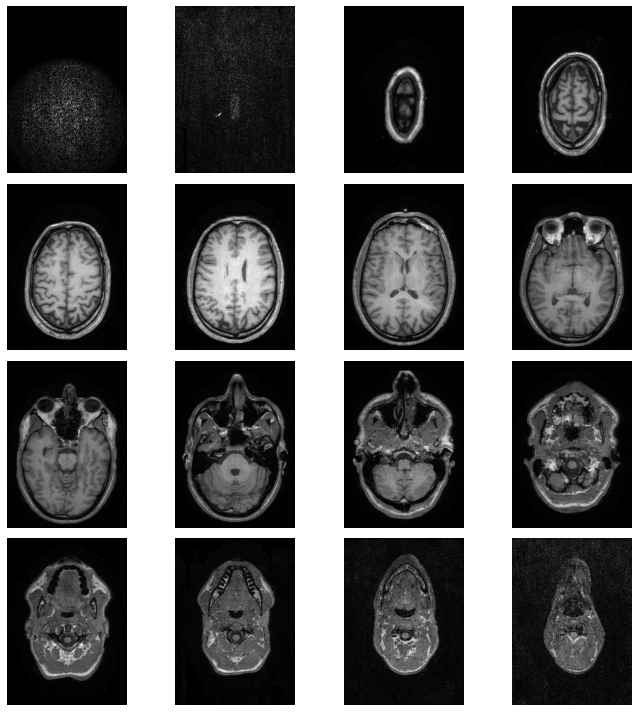

In [48]:
n_slice = brain_vol.shape[1]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(brain_vol[:, img, :], 270), 
                         cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()

### Coronal plane

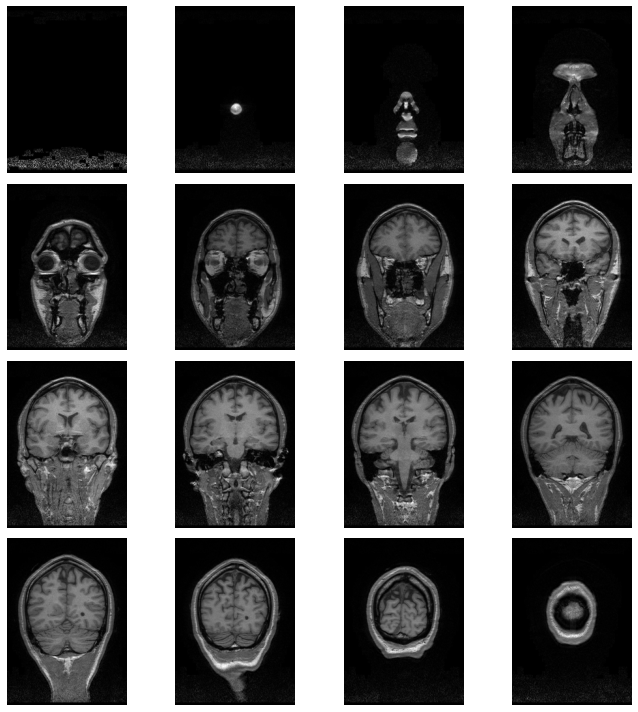

In [49]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol.shape[2]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size

start_stop = int((n_slice - plot_range) / 2)


fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(brain_vol[:, :, img], 270), 
                         cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()

## Plotting an image histogram

As we saw above, the image is stored as a NumPy array, in which each voxel in the image is represented as a number, which is mapped to an intensity value in the colormap when plotting. Larger values appear as brighter (whiter), and lower values appear as darker.

Histograms of the anatomical images show the number of voxels of a given intensity value. These can be informative because the distribution of intensity values in an anatomical image is not uniform. Instead, as we can see above, there are many very dark voxels (outside of the head, and in some of the fluid-filled spaces inside the head), and then clusters of voxels that are darker grey (the grey matter, largely in the cerebral cortex that forms the outer layer of the brain), lighter grey (the white matter that comprises much of the inside of the brain), and also some very bright areas that are primarily due to areas of fat concentration.

We can use ndimage's `.histogram()` function to plot a histogram of our brain volume. We use this rather than the NumPy `histogram` function, because ndimage's function is designed to work with 3D images. This function requires several arguments, including the minimum and maximum intensity values that define the range of the *x* axis of the histogram, and the number of bins:

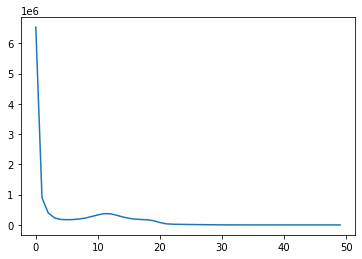

In [44]:
plt.plot(ndi.histogram(brain_vol, min=0, max=np.max(brain_vol), bins=50))
plt.show()

In the histogram above, there is a large peak close to zero which represents the fact that a large number of voxels in the image don't contain the head at all, and therefore have values at or close to zero. We can see a peak just above 10 on the *x* axis (note that the numbers on the *x* axis are bin numbers, not intensity values), with a slight decrease and then a second small peak just before 20, followed by a flat area. The peaks just above 10 and just below 20 reflect the concentration of similar intensity values corresponding to grey and white matter respectively. 

## Mask an image

We can use an image histogram like this to create a **mask** that isolates a particular range of intensity values in the image, while setting all other intensity values to zero. This can be useful in certain types of analysis, such as if we want to isolate only grey matter, or only white matter, from the rest of the brain. This is often used in studies that measure the volume of grey and/or white matter separately, as well as in functional MRI analyses where the interest is often only in activation in the cerebral cortex (grey matter). 

In the code below, we will attempt to isolate grey matter based on intensity values from the histogram above. Note that this is an overly-simplistic approach to separating grey and white matter in MRIs, compared to more sophisticated, automated, and accurate approaches that would be used in research or clinical care. However, it is an important step in those more sophisticated approaches.

First, we manually define the range of intensity values that we consider grey matter. Based on the histogram above, we will choose a range from bins 10 – 15. Since the *x* axis of the histogram is bin numbers, not intensity values, we need to determine what intensities those bin numbers correspond to. Since we know the histogram divided the range from 0 to the maximum intensity value in the image, into 50 bins, we can divide the max intensity value by 50 to get the width of each bin, then multiply by the values we observed on the *x* axis:

In [65]:
gm_min = ((np.max(brain_vol)) / 50) * 10
gm_max = ((np.max(brain_vol)) / 50) * 15

Next we use `np.where()` to create two *binary masks* of the image. A binary mask is an image (in this case, a NumPY array) in which each voxel's value is either 1 or 0. For the first mask, any voxel whose intensity is greater than `gm_min` is set to 1, and the others (lower values) are set to 0. In the second mask, any voxel less than `gm_max` is set to 1, and larger values are set to zero.

In [65]:
brain_mask1 = np.where(brain_vol > gm_min, 1, 0)
brain_mask2 = np.where(brain_vol < gm_max, 1, 0)

Having done this, we combine the two masks by adding them. Now, any voxel that is in the range between `gm_min` and `gm_max` will have a value of 2. Finally, we use `np.where()` again to create a final mask in which any voxel from the combined mask with a value of 2 (grey matter) is set to 1, and all other voxels (those both above and below our grey matter range) are set to zero.

In [65]:
brain_mask = brain_mask1 + brain_mask2
brain_mask = np.where(brain_mask == 2, 1, 0)

When we plot this final mask, we can see that it does a pretty good job of isolating the grey matter of the cortex. There is also grey matter around the ventricles (those dark areas in the centre of the brain in the images we plotted above) which shows up here. Unfortunately, a lot of the tissue in the scalp is also in the same intensity range as grey matter, so we are not able to separate these based on intensity values. Often prior to performing this type of image segmentation, a preprocessing step called *skull stripping* is applied, which (as it sounds) isolates and removes the skull and other non-brain tissues from the image. Skull stripping is more advanced than we will cover here. 

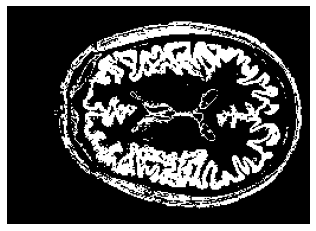

In [77]:
plt.imshow(brain_mask[:, 96, :], cmap='gray')
plt.axis('off')
plt.show()

## Image smoothing

One preprocessing operation that can be useful in working with images **smoothing**. Smoothing is really spatial filtering, and it is commonly applied by averaging together the intensity values of nearby voxels. This averaging is done in a weighted fashion, based on distance between voxels. For example, for each voxel we could average together the intensity of that voxel, with half the intensity of the voxels adjacent to it on all sides, and perhaps 10% of intensities that were 2 voxels away from it. In fact, the most common **smoothing kernel** (the mathematical function used to perform this weighted averaging) is called a *Gaussian* kernel, which is shaped like a normal (bell) curve. In 2 dimensions, it looks like this:

![](./images/gaussian_kernel_2D.jpg)


When applied to an image slice, a Gaussian smoothing kernel reduces noise, that is, the amount of voxel-to-voxel variation in intensities. So, adjacent voxels will have more similar intensity values after smoothing, making the image appear more blurred. The image below shows an example of the effects of smoothing. In this image, the intensity at each point in the image slice is shown by the height of the mesh at that location, as well as the color. 

![](./images/smoothed_vs_unsmoothed_mesh.jpg)

Below we will apply Gaussian smoothing to our MRI volume using ndimage's `gaussian_filter()` function. The one argument we need to supply is `sigma`, which is the width of the smoothing kernel, expressed as units of standard deviation. A larger sigma value will result in a smoother (blurrier) image, because we average over a larger number of voxels.  

In [96]:
sigma = 2
smoothed = ndi.gaussian_filter(brain_vol, sigma)

To plot the image we just re-use the code we used above:

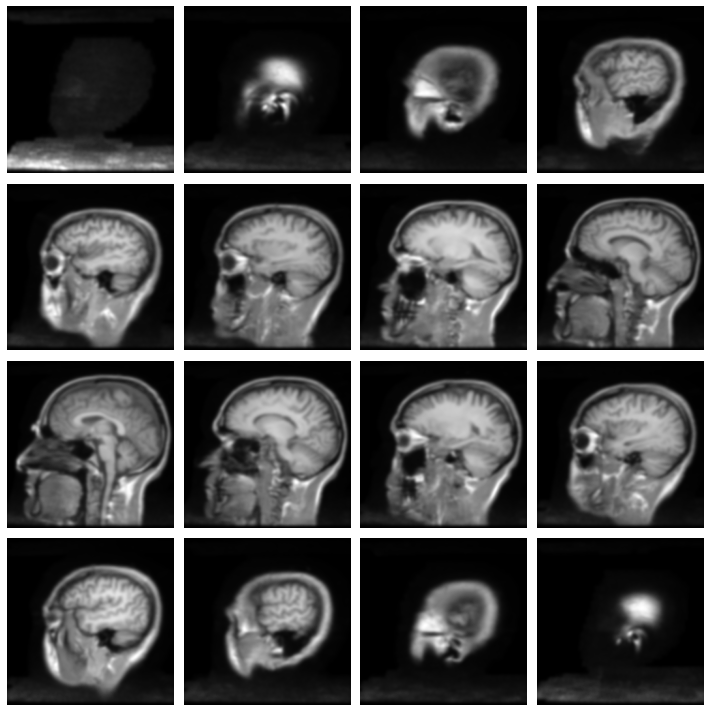

In [97]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size

start_stop = int((n_slice - plot_range) / 2)


fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(smoothed[img, :, :], cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()

Below we increase `sigma` to 4, resulting in a more smoothed image:

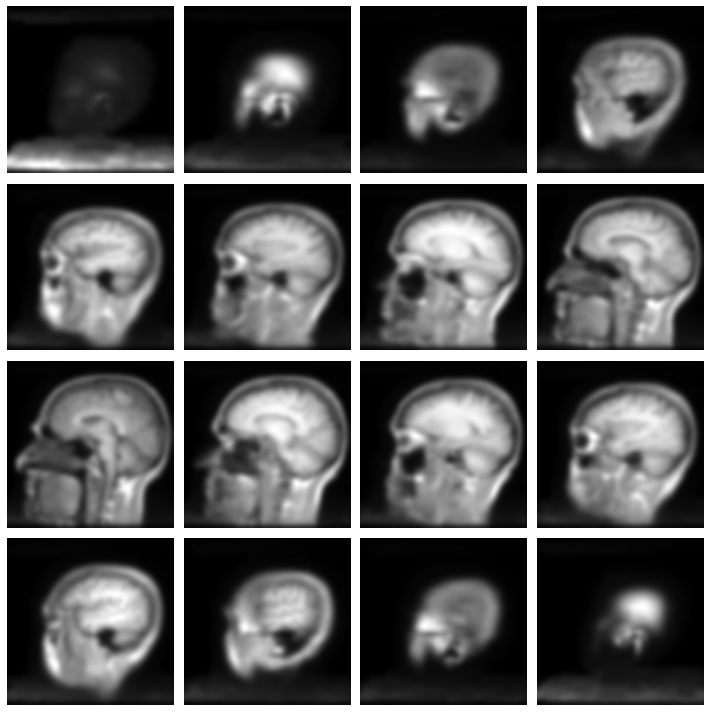

In [98]:
sigma = 4
smoothed = ndi.gaussian_filter(brain_vol, sigma)

fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size

start_stop = int((n_slice - plot_range) / 2)


fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(smoothed[img, :, :], cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()

## Segmenting smoothed images

One benefit of smoothing, and the corresponding reduction in noise in the image, is that it can make segmentation a bit cleaner, because adjacent voxels will have more similar values — so they are less extreme overall, and less variable from voxel to voxel. Below we plot the histogram of the smoothed image, and use it (as we did earlier) to determine cutoffs for grey matter and then segment the image. Note that the histogram is different, and more smoothing, due to the smoothing applied to the intensity values.

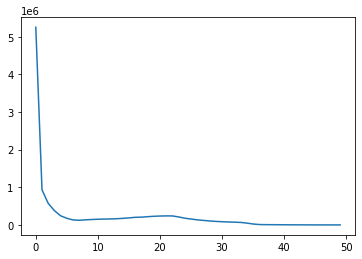

In [113]:
filt = ndi.gaussian_filter(brain_vol, sigma=2)
plt.plot(ndi.histogram(filt, min=0, max=np.max(filt), bins=50))
plt.show()

Based on the above histogram we select 16 – 25 as our range of bins for grey matter.

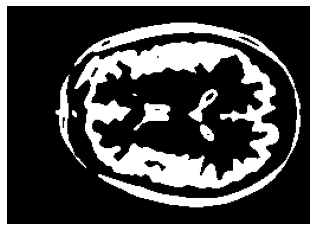

In [120]:
gm_min = ((np.max(filt)) / 50) * 16
gm_max = ((np.max(filt)) / 50) * 25

brain_mask1 = np.where(filt > gm_min, 1, 0)
brain_mask2 = np.where(filt < gm_max, 1, 0)

brain_mask = brain_mask1 + brain_mask2
brain_mask = np.where(brain_mask == 2, 1, 0)

plt.imshow(brain_mask[:, 96, :], cmap='gray')
plt.axis('off')
plt.show()

We can see that this results in a 'cleaner' depiction of the grey matter, and in general the grey matter is separated by black (0) voxels from the skull.